## Stable Sort  
>Stable sorting algorithms maintain the relative order of records with equal keys (i.e. values). That is, a sorting algorithm is stable if whenever there are two records R and S with the same key and with R appearing before S in the original list, R will appear before S in the sorted list.

# MergeSort
## Binary Recursion  

O(NlogN)

In [9]:
import numpy as np   

def mergesort(a):
    aux = np.copy(a)
    sort(a,0,len(a)-1, aux)
    return a


def sort(a, low, high, aux):
    
    # Base case: nothing to do
    if (high <= low): 
        return
    
    # Find the midpoint
    mid = low + int(np.floor(((high - low) / 2)))   
    
    # Divide and Conquer using Recursion!
    sort(a, low, mid, aux)      # Sort left half  
    sort(a, mid+1, high, aux)   # Sort right half
    
    # Merge left and right halves
    merge(a, low, mid, high, aux)

def merge(a, low, mid, high, aux):
    
    i = int(low)
    j = int(mid + 1)
    
    # Make a copy
    aux[low:high+1] = a[low:high+1]
    
    # Merge two arrays
    k = int(low)
    while (k <= high):
        while ( (i <= mid) & (j <= high) ):
            if ( aux[j] < aux[i] ):
                a[k] = aux[j]
                j += 1
                k += 1
            else:
                a[k] = aux[i]
                i += 1
                k += 1
        # Now either i > mid or j > high
        # So only one of below loops will run
        while (i <= mid):
            a[k] = aux[i]
            i += 1
            k += 1
        while (j <= high):
            a[k] = aux[j]
            j += 1
            k += 1

In [18]:
import timeit

N = [1e2, 1e4, 1e6, 1e8]

a = np.random.randint(low=0,high=int(N[0]),size=int(N[0]))

t = timeit.Timer(lambda: mergesort(a))

print t.timeit(number=1), 'seconds'

0.00111603736877 seconds


In [27]:
def time_mergesort(N):
    # Initialize array of random numbers between 0 and N with length N 
    a = np.random.randint(low=0,high=int(N),size=int(N))

    # Define timed mergesort object, t
    t = timeit.Timer(lambda: mergesort(a))

    # Run t once and return time
    return t.timeit(number=1)

In [45]:
## ~~ WARNING ~~ THIS CELL HAS A RUNTIME OF 1.5 HOURS! ##

# Define array to hold times
times = np.zeros([len(N), 3])

# For each array length
for i in range(len(N)):
    # For 3 trials
    for j in range(3):
        # Store mergesort runtime
        times[i,j] = time_mergesort(N[i])

In [57]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rcParams['font.size'] = 20.0
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=30, usetex=True)

/astro/users/jlustigy/.conda/envs/my_root/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


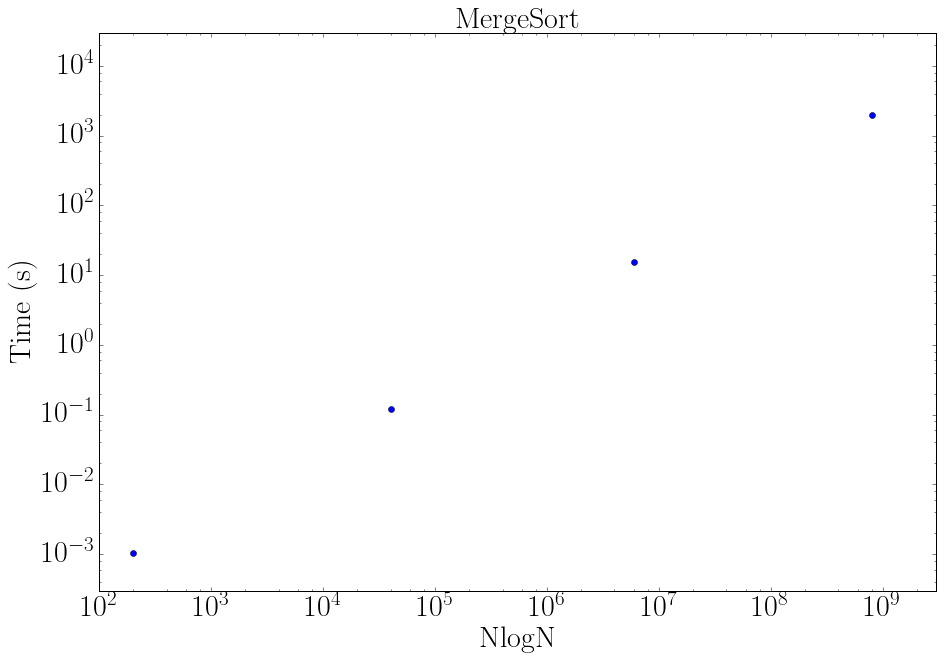

In [58]:
# Calculate average time for the three trials
avgt = np.mean(times, axis=1)

# Plot results
fig = plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.plot(N * np.log10(N), avgt, 'o')
ax0.set_xlabel('NlogN')
ax0.set_ylabel('Time (s)')
ax0.set_title('MergeSort')
ax0.loglog()
ax0.set_ylim([3e-4,3e4])
ax0.set_xlim([1e2,3e9])
fig.savefig('mergesort.pdf')
fig.show()